In [1]:
!pip install shap


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import shap

In [5]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)


In [7]:
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [8]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


Text(0.5, 1.0, 'Attrition Count')

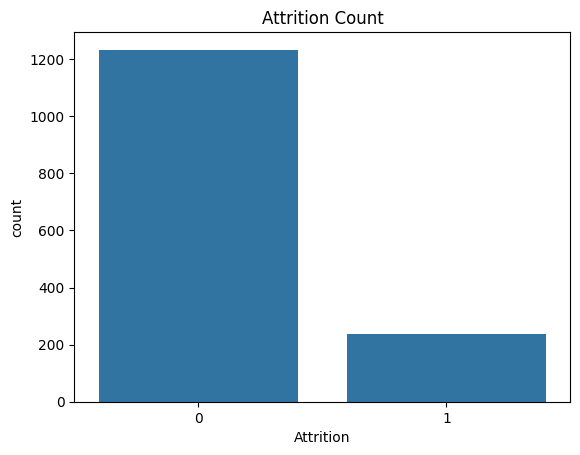

In [9]:
# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')

Text(0.5, 1.0, 'Attrition by Department')

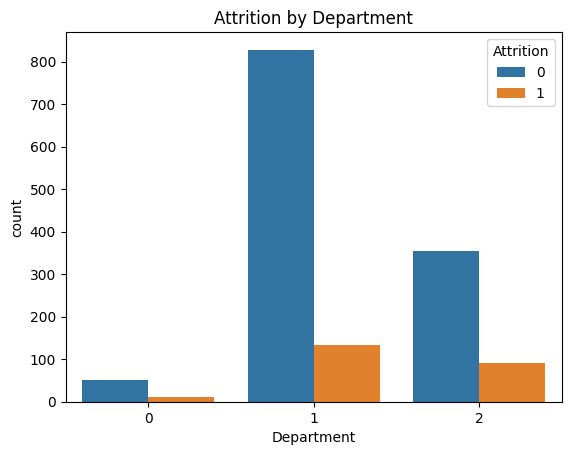

In [10]:
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')


Text(0.5, 1.0, 'Attrition by Income Band')

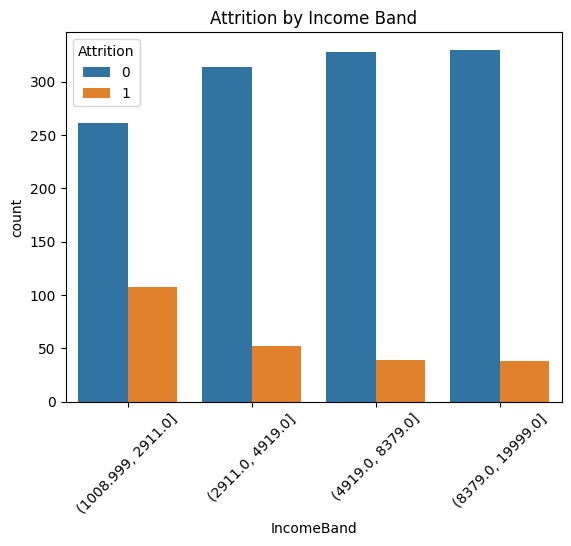

In [11]:
# Attrition by Salary Band (e.g., MonthlyIncome)
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4)
sns.countplot(data=df, x='IncomeBand', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition by Income Band')

Text(0.5, 1.0, 'Promotion History vs Attrition')

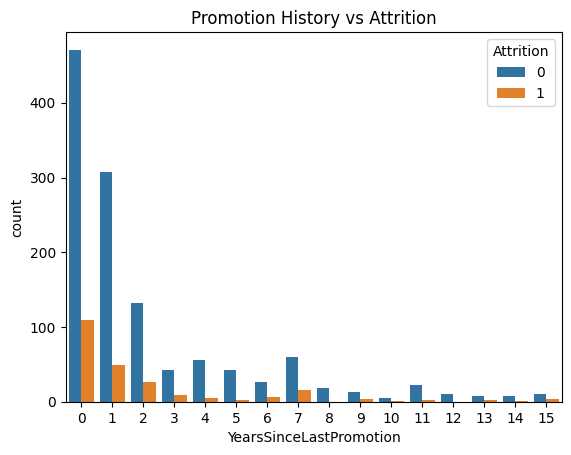

In [12]:
# Promotion vs Attrition
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='Attrition')
plt.title('Promotion History vs Attrition')

In [13]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']  # Already encoded (Yes = 1, No = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


A. Logistic Regression


In [15]:
df = df.drop(columns=['IncomeBand'])


In [16]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Run Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.8775510204081632
[[252   3]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


B. Decision Tree


In [18]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8333333333333334
[[239  16]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       255
           1       0.27      0.15      0.20        39

    accuracy                           0.83       294
   macro avg       0.58      0.55      0.55       294
weighted avg       0.80      0.83      0.81       294



A. Initialize SHAP Explainer


<Figure size 640x480 with 0 Axes>

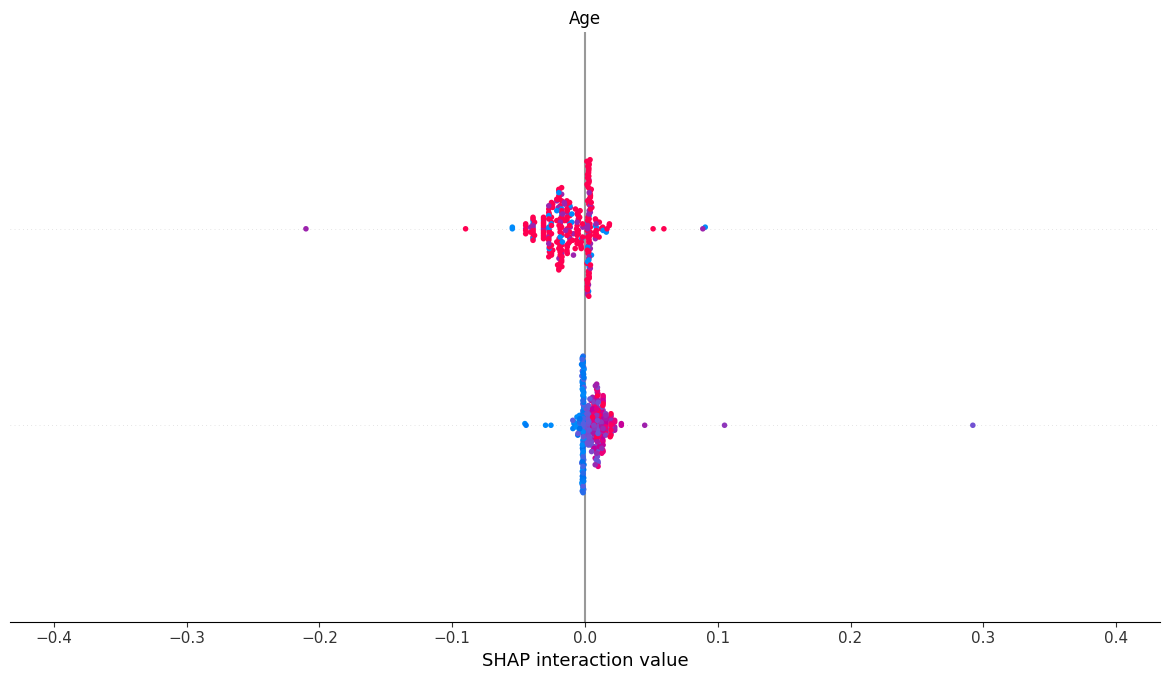

In [21]:
# A. Initialize SHAP Explainer

explainer = shap.TreeExplainer(dt)  # Use for tree models
shap_values = explainer.shap_values(X_test)

# Use the shap_values list directly and specify the class index
shap.summary_plot(shap_values, X_test, class_inds=1) # Class 1 = Attrition

<Figure size 640x480 with 0 Axes>

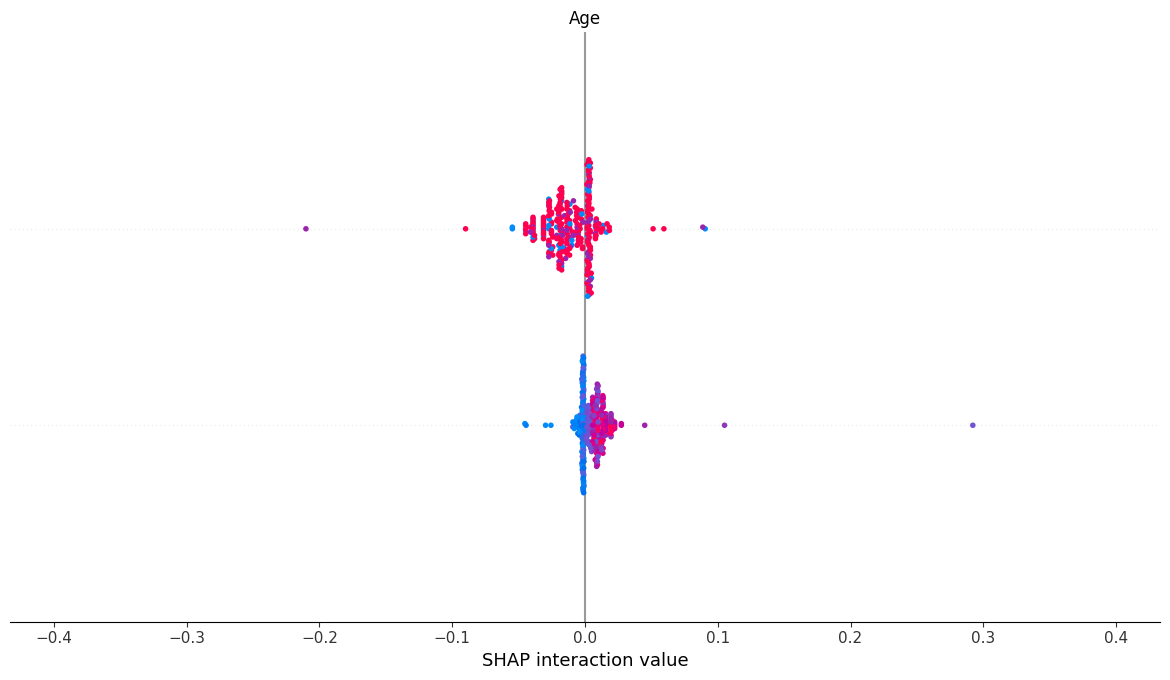

In [23]:
shap.summary_plot(shap_values, X_test, plot_type="bar", class_inds=1)

In [25]:
shap.initjs()
i = 5
shap.force_plot(explainer.expected_value[1], shap_values[i, :, 1], X_test.iloc[i])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8775510204081632
[[252   3]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.15      0.25        39

    accuracy                           0.88       294
   macro avg       0.78      0.57      0.59       294
weighted avg       0.86      0.88      0.84       294

Decision Tree Accuracy: 0.826530612244898
[[237  18]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       255
           1       0.25      0.15      0.19        39

    accuracy                           0.83       294
   macro avg       0.56      0.54      0.55       294
weighted avg       0.79      0.83      0.81       294



<Figure size 640x480 with 0 Axes>

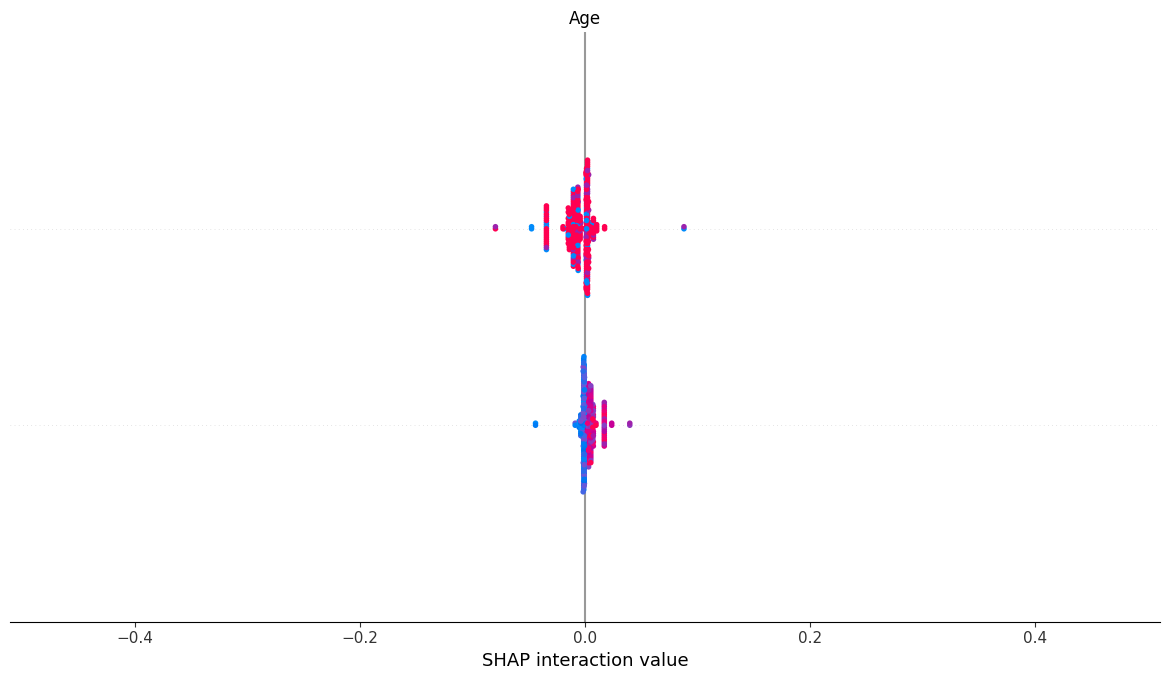

<Figure size 640x480 with 0 Axes>

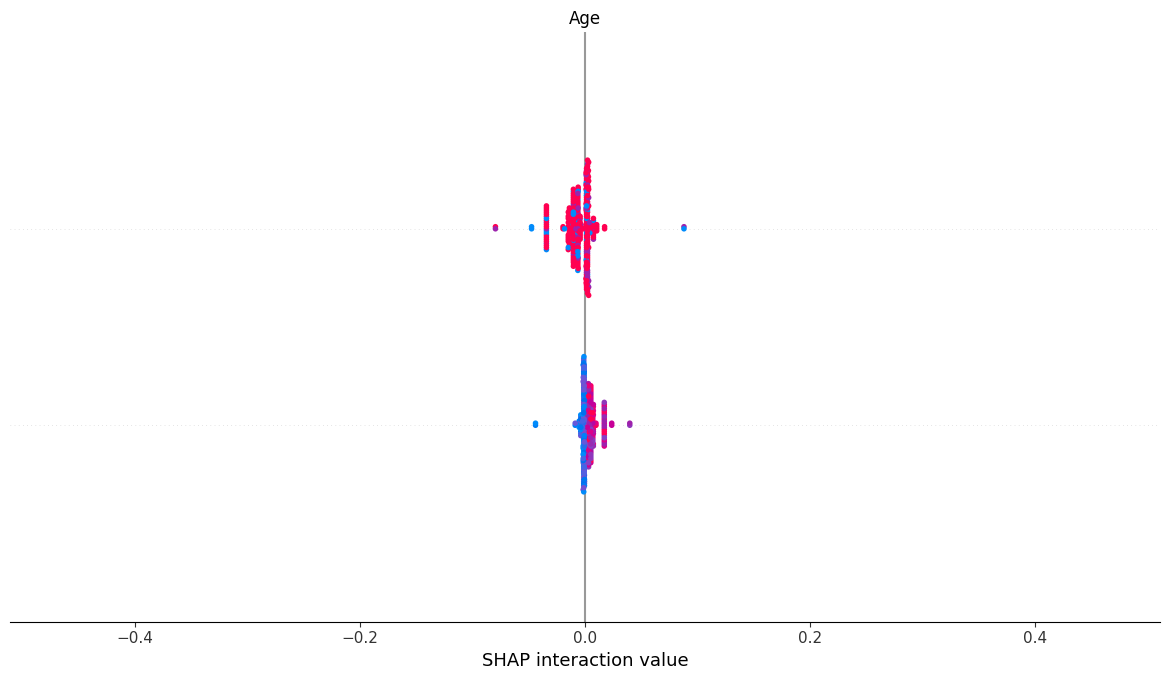

In [27]:
# %%
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()
# %%
# Keep 'EmployeeNumber' for now, drop other unnecessary columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)

# %%
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
# %%
df.isnull().sum()

# %%
# Attrition Count
sns.countplot(data=df, x='Attrition')
plt.title('Attrition Count')
# %%
# Attrition by Department
sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')

# %%
# Attrition by Salary Band (e.g., MonthlyIncome)
df['IncomeBand'] = pd.qcut(df['MonthlyIncome'], q=4)
sns.countplot(data=df, x='IncomeBand', hue='Attrition')
plt.xticks(rotation=45)
plt.title('Attrition by Income Band')
# %%
# Promotion vs Attrition
sns.countplot(data=df, x='YearsSinceLastPromotion', hue='Attrition')
plt.title('Promotion History vs Attrition')
# %%
# Define features X by dropping 'Attrition' and 'EmployeeNumber'
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']  # Already encoded (Yes = 1, No = 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# %% [markdown]
# A. Logistic Regression
#
# %%
# IncomeBand was added for plotting, drop it before model training if not used as a feature
# If you intended to use IncomeBand as a feature, remove this line and update the X definition
df = df.drop(columns=['IncomeBand'])

# Redefine X and y after dropping IncomeBand, ensuring 'EmployeeNumber' is still excluded from X
X = df.drop(['Attrition', 'EmployeeNumber'], axis=1)
y = df['Attrition']

# Re-split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Run Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# %% [markdown]
# B. Decision Tree
#
# %%
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# %% [markdown]
# A. Initialize SHAP Explainer
#
# %%
# A. Initialize SHAP Explainer

explainer = shap.TreeExplainer(dt)  # Use for tree models
shap_values = explainer.shap_values(X_test)

# Use the shap_values list directly and specify the class index
shap.summary_plot(shap_values, X_test, class_inds=1) # Class 1 = Attrition
# %%
shap.summary_plot(shap_values, X_test, plot_type="bar", class_inds=1)
# %%
shap.initjs()
i = 5
shap.force_plot(explainer.expected_value[1], shap_values[i, :, 1], X_test.iloc[i])
# %%
# To include EmployeeNumber in the final CSV, get it from the original df
# using the index of X_test. The original df still contains EmployeeNumber
# since we didn't drop it in the initial step.
X_test['EmployeeNumber'] = df.loc[X_test.index, 'EmployeeNumber']
X_test['Attrition_Prediction'] = y_pred_dt
X_test['Attrition_Probability'] = dt.predict_proba(X_test.drop(['EmployeeNumber', 'Attrition_Prediction'], axis=1))[:,1]

X_test.to_csv("ML_Predictions.csv", index=False)